# Tarefa 13 de Álgebra Linear Computacional

Atividade sobre Métodos de Potência.

* **Aluna:** Bárbara Neves
* **Matrícula:** 507526

### Descrição

Implemente o **Método SOR (*Successive Over Relaxation*)** para resolver, de forma iterativa, um sistema de equações algébricas lineares.

Teste vários valores do parâmetro $\omega$ para ver sua influência na aceleração da convergência.

# Imports

In [1]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)

# SOR (*Successive Over Relaxation*)

O **Método SOR (*Sucessive Over Relaxation*)** é um tipo de método iterativo para resolver sistemas lineares. 

O SOR pode ser derivado do Método de Gauss-Seidel com um parâmetro positivo $\omega$. Ele pode convergir mais rápido do que o Método de Gauss-Seidel quando um $\omega$ adequado é escolhido.

<center>
  <img width="1000" src="https://drive.google.com/uc?id=11jW2MuVNN9DVlrL53_rjHZFMmlSN4Fx3" />
</center>

### **Relembrando: Método de Gauss-Seidel**

1. O Método de Gauss-Seidel pode ser aplicado a qualquer matriz com elementos não nulos nas diagonais.
2. O método converge quando os maiores elementos estiverem localizados na diagonal principal da matriz de coeficientes.
3. Ao contrário do Método de Jacobi, apenas um vetor de armazenamento é necessário durante o cálculo iterativo, o que pode ser vantajoso para resolver problemas muito grandes.

\\

---

\\

Como citado anteriormente, o Método SOR é derivado do Método de Gauss-Seidel. Ele assume a forma de uma média ponderada entre a iteração anterior e a iteração de Gauss-Seidel calculada sucessivamente para cada componente. 

> **Parâmetro $\omega$:** fator de relaxamento.

Quando $\omega = 1$, podemos usar Gauss-Seidel naturalmente; já o $\omega > 1$, o método é conhecido como SOR. 

> **Curiosidade:** a escolha ótima de $\omega$ nunca excede 2. Muitas vezes, fica próximo de $1.9$. 

Assim, como a escolha de $\omega$ não é necessariamente fácil já que depende das propriedades da matriz de coeficientes, em geral, SOR não converge se $\omega$ estiver fora do intervalo $(0, 2)$.








In [2]:
def sor(A, b, omega, tolerance=1e-10):
  b = np.asmatrix(b).transpose()
  x = np.zeros_like(b) # x inicial
  total_iter = 0

  residual = np.linalg.norm(np.matmul(A, x) - b) #Resíduo (erro) inicial
  D = np.diag(np.diag(A))
  L = -np.tril(A, -1)
  U = -np.triu(A, 1)

  B = np.mat(np.linalg.inv(D - omega * L))* np.mat(((1 - omega) * D + omega * U))
  f = omega * np.mat(np.linalg.inv(D - omega * L)) * np.mat(b)
  
  while residual > tolerance:
    x_old = x
    total_iter += 1
    
    x = B * x + f

    residual_old = residual
    residual = np.linalg.norm(x - x_old)
    
    if np.isclose(residual_old, residual):
      break
  
  return x, total_iter

In [3]:
def plot_sor_convergence(A, b, omega_rate, tolerance=1e-10):
  data = pd.DataFrame(columns=['total_iter', 'omega'])

  for omega in omega_rate:
    _, total_iter = sor(A, b, omega, tolerance)
    data = data.append({
        'total_iter': total_iter,
        'omega': omega
    }, ignore_index=True)
  print(data, '\n')
  print("Pior iteração = {} - Ômega = {}".format(data['total_iter'].max(), data['omega'].loc[data['total_iter'].idxmax()]))
  print("Melhor iteração = {} - Ômega = {}\n\n".format(data['total_iter'].min(), data['omega'].loc[data['total_iter'].idxmin()]))

  cmap = sns.cubehelix_palette(as_cmap=True)
  
  plt.figure(figsize=(12, 8))
  sns.color_palette("rocket", as_cmap=True)

  sns.lineplot(data=data, x='omega', y='total_iter', label='Linha de Convergência', color='firebrick', marker='o', markersize=10)

  plt.xlabel('Ômega - ω', fontsize=14)
  plt.ylabel('Iterações', fontsize=14)
  plt.title('Número de iterações do método SOR', fontsize=14)
  
  plt.legend()
  plt.show()

## Comparações

### Exemplo 1

Dada a simples equação linear $Ax = b$, definida por 

\begin{gather*} 
  A_1 = \begin{bmatrix}
  4 & 3 & 0 \\ 
  3 & 4 & -1 \\ 
  0 & -1 & 4
  \end{bmatrix} 
  \qquad
  b_1 = \begin{bmatrix}
  24 \\ 
  30 \\ 
  -24 
  \end{bmatrix}
\end{gather*}

com o vetor solução 

\begin{gather*} 
  x_1 = \begin{bmatrix}
  3 \\ 
  4 \\ 
  -5 
  \end{bmatrix}
\end{gather*}

O exemplo acima foi retirado do seguinte [*link*](https://atozmath.com/example/CONM/GaussEli.aspx?he=e&q=SOR2&ex=1).

In [4]:
A_1 = np.array([
  [4, 3, 0], 
  [3, 4, -1],
  [0, -1, 4]
], dtype='float32')

b_1 = np.array([
  24, 
  30, 
  -24
], dtype='float32')

> Primeiramente, iremos identificar o valor ótimo para o parâmetro $\omega$ e, em seguida, aplicar a solução do Método SOR diretamente ao sistema linear acima. A tolerância de convergência da iteração (critério de parada) foi definida como $10^{-11}$.

    total_iter  omega
0        236.0    0.1
1        103.0    0.2
2        110.0    0.3
3         97.0    0.4
4         79.0    0.5
5         72.0    0.6
6         57.0    0.7
7         50.0    0.8
8         42.0    0.9
9         34.0    1.0
10        27.0    1.1
11        21.0    1.2
12        21.0    1.3
13        19.0    1.4
14        27.0    1.5
15        31.0    1.6 

Pior iteração = 236.0 - Ômega = 0.1
Melhor iteração = 19.0 - Ômega = 1.4000000000000001




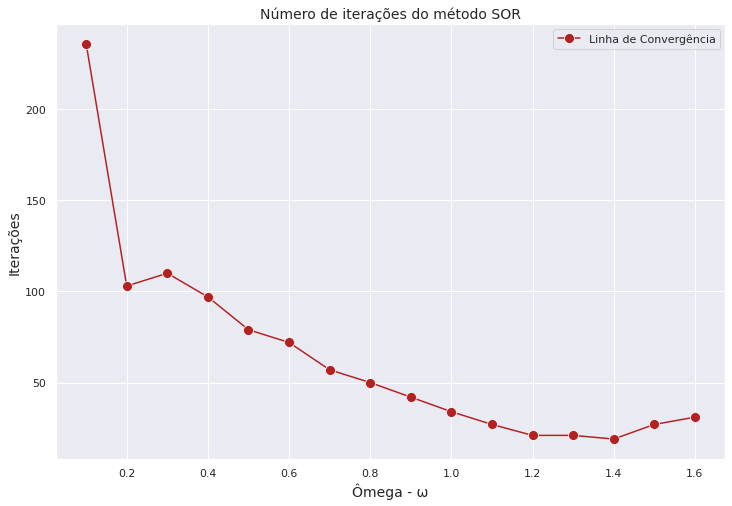

In [5]:
plot_sor_convergence(A_1, b_1, omega_rate=np.arange(0.1, 1.7, 0.1))

In [6]:
# Valor identificado acima como sendo o mais rápido de conversão
omg_1 = 1.4

x_1, _ = sor(A_1, b_1, omega=omg_1)

print("Vetor solução (x) =\n{}".format(x_1))

Vetor solução (x) =
[[ 3.]
 [ 4.]
 [-5.]]


### Exemplo 2

Dado seguinte sistema linear 

\begin{gather*} 
  4x_1 - x_2 - 6x_3 = 2, \\
  -5x_1 - 4x_2 + 10x_3 + 8x_4 = 21, \\
  9x_2 + 4x_3 + 2x_4 = -12, \\
  x_1 - 7x_3 + 5x_4 = -6
\end{gather*}

A solução do sistema acima é: 

\begin{gather*} 
\begin{bmatrix}
  3 \\ 
  -2 \\ 
  2 \\
  1 
  \end{bmatrix}
\end{gather*}

O exemplo acima foi retirado do seguinte [*link*](https://en.wikipedia.org/wiki/Successive_over-relaxation).

In [7]:
A_2 = np.array([
  [4, -1, -6, 0], 
  [-5, -4, 10, 8],
  [0, 9, 4, -2],
  [1, 0, -7, 5]
], dtype='float32')

b_2 = np.array([
  2, 
  21, 
  -12,
  -6
], dtype='float32')

> Primeiramente, iremos identificar o valor ótimo para o parâmetro $\omega$ e, em seguida, aplicar a solução do Método SOR diretamente ao sistema linear acima. A tolerância de convergência da iteração (critério de parada) foi definida como $10^{-11}$.

    total_iter  omega
0        194.0    0.1
1         97.0    0.2
2         62.0    0.3
3         64.0    0.4
4         36.0    0.5
5        137.0    0.6
6         46.0    0.7
7         33.0    0.8
8         27.0    0.9
9         23.0    1.0
10        21.0    1.1
11        19.0    1.2
12        18.0    1.3
13        17.0    1.4
14        16.0    1.5
15        15.0    1.6
16        15.0    1.7
17        14.0    1.8
18        14.0    1.9 

Pior iteração = 194.0 - Ômega = 0.1
Melhor iteração = 14.0 - Ômega = 1.8000000000000003




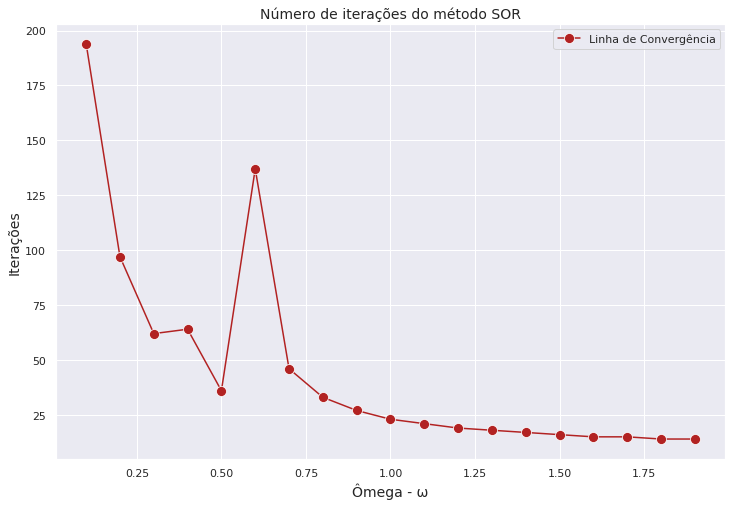

In [8]:
plot_sor_convergence(A_2, b_2, omega_rate=np.arange(0.1, 2, 0.1))

In [9]:
# Valor identificado acima como sendo o mais rápido de conversão
omg_2 = 0.5

x_2, _ = sor(A_2, b_2, omega=omg_2)

print("Vetor solução (x) =\n{}".format(x_2))

Vetor solução (x) =
[[ 3.]
 [-2.]
 [ 2.]
 [ 1.]]


### Exemplo 3

Dado seguinte sistema linear 

\begin{gather*} 
  3x_1 - x_2 + x_3 = -1, \\
  -x + 3y - x_3 = 7, \\
  x_1 - x_2 + 3x_3 = -7 
\end{gather*}

A solução do sistema acima é: 

\begin{gather*} 
\begin{bmatrix}
  1 \\ 
  2 \\ 
  -2
  \end{bmatrix}
\end{gather*}

O exemplo acima foi retirado do seguinte [*link*](https://atozmath.com/example/CONM/GaussEli.aspx?he=e&q=SOR2&ex=0).

In [10]:
A_3 = np.array([
  [3, -1, 1], 
  [-1, 3, -1],
  [1, -1, 3]
], dtype='float32')

b_3 = np.array([
  -1, 
  7, 
  -7
], dtype='float32')

    total_iter  omega
0        164.0    0.1
1         91.0    0.2
2         67.0    0.3
3         43.0    0.4
4         36.0    0.5
5         28.0    0.6
6         22.0    0.7
7         19.0    0.8
8         16.0    0.9
9         13.0    1.0
10        14.0    1.1
11        15.0    1.2
12        21.0    1.3
13        28.0    1.4
14        31.0    1.5
15        44.0    1.6
16        58.0    1.7
17        94.0    1.8
18       163.0    1.9 

Pior iteração = 164.0 - Ômega = 0.1
Melhor iteração = 13.0 - Ômega = 1.0




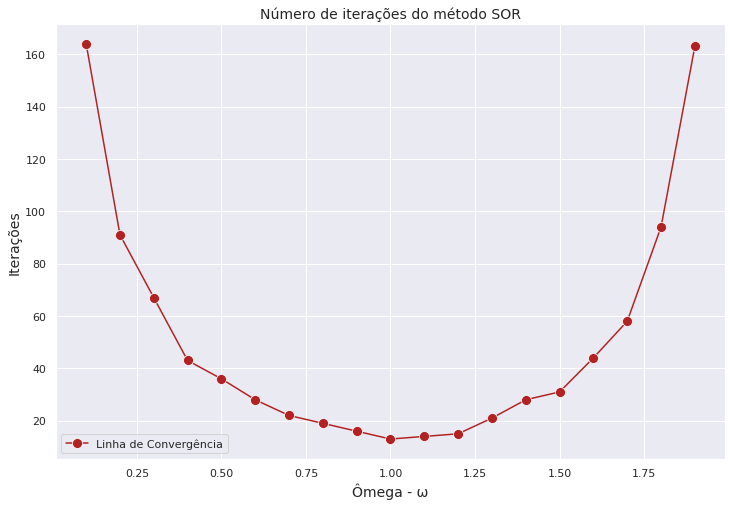

In [11]:
plot_sor_convergence(A_3, b_3, omega_rate=np.arange(0.1, 2, 0.1))

In [12]:
# Valor identificado acima como sendo o mais rápido de conversão
omg_3 = 1

x_3, _ = sor(A_3, b_3, omega=omg_3)

print("Vetor solução (x) =\n{}".format(x_3))

Vetor solução (x) =
[[ 1.]
 [ 2.]
 [-2.]]
